<h3>Result without stop word removal</h3>

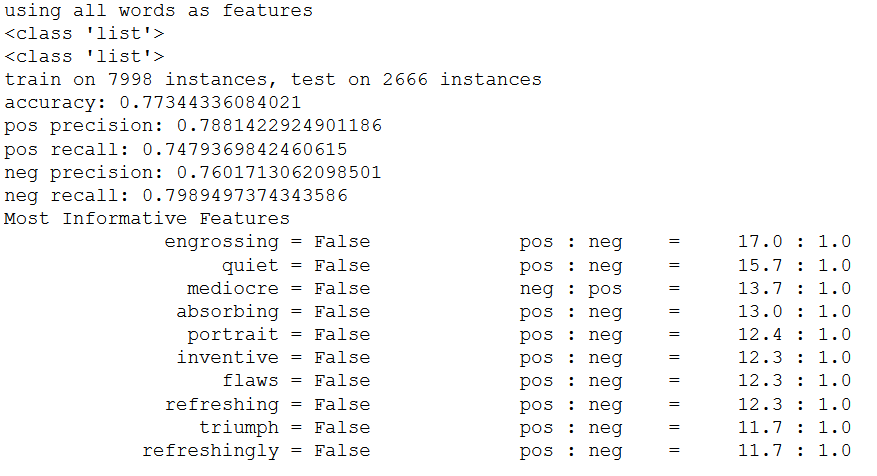

<h3>Accuracy after stop words removal</h3>

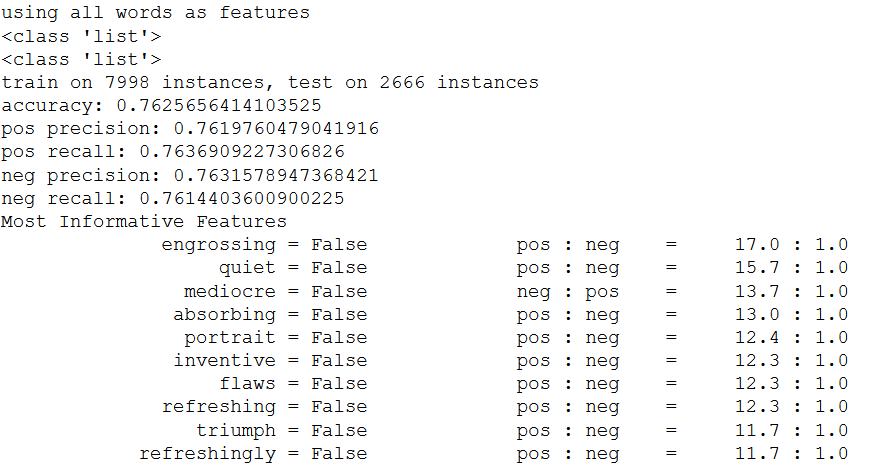

In [3]:
#for sentences
def pre_process(text):
    def remove_stop_words(pre_processed_text):
        if pre_processed_text == None or pre_processed_text == []:
            print("Error..Exiting")
        else:
            stopwds = set(stopwords.words('english'))
            stext = pre_processed_text.split(' ')
            rtext = ''
            for ele in stext:
                if ele not in stopwds:
                    rtext += ele + ' '
        return rtext #this returns each string
    final_res = []
    for t in text:
         final_res.append(remove_stop_words(t))
    return final_res

#for words
def wremove_stop_words(pre_processed_text):
        if not pre_processed_text:
            print("Error..Exiting")
        else:
            stopwds = set(stopwords.words('english'))
            rtext = ''
            if pre_processed_text not in stopwds:
                rtext += pre_processed_text + ' '
        return rtext



In [37]:
# http://andybromberg.com/sentiment-analysis-python/
# Andy Bromberg's Simple Sentiment Analysis System
# Uses data from Pang & Lee (2005)
# Uses a Naive Bayes Classifier Train the System
#  NB Updated 2016 for package changes around scores

import string, re, math, collections, itertools, sys, os
import nltk, nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier, DecisionTreeClassifier
from nltk.metrics import BigramAssocMeasures, scores
from nltk.probability import FreqDist, ConditionalFreqDist
from pathlib import Path 
from nltk.tokenize import word_tokenize
from nltk import precision
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.linear_model import LogisticRegression

cwd = Path().absolute()
__location__ = cwd/'XLect10.Progs'
print(f'File path : {__location__}')

stop_words = set(stopwords.words('english'))
def evaluate_features(feature_select):
    #reading pre-labeled input and splitting into lines
    negSentences = open(os.path.join(__location__, 'rt-polarity-neg.txt'), 'r', encoding='utf8')
    posSentences = open(os.path.join(__location__, 'rt-polarity-pos.txt'), 'r', encoding='utf8')
    negSentences = re.split(r'\n', negSentences.read())
    posSentences = re.split(r'\n', posSentences.read())
    #negSentences = pre_process(negSentences)
    #posSentences = pre_process(posSentences)
    
    posFeatures = []
    negFeatures = []
    # breaks up the sentences into lists of individual words
    # creates instance structures for classifier
    for i in posSentences:
        posWords = re.findall(r"[\w']+|[.,!?;]", i)  
        #posWords = nltk.word_tokenize(i)
        #posWords = [re.sub(r'\'[a-z]+[ ]*$',' ',w) for w in posWords]
        #posWords = [w.lower().strip() for w in posWords if not w in stop_words]
        #posWords = [w for w in posWords if not w in string.punctuation and len(w) > 1 and not w.isdigit()]  
        posWords = [feature_select(posWords), 'pos']
        posFeatures.append(posWords)
    for i in negSentences:
        negWords = re.findall(r"[\w']+|[.,!?;]", i)  
        #negWords = nltk.word_tokenize(i)
        #negWords = [re.sub(r'\'[a-z]+[ ]*$',' ',w) for w in negWords]
        #negWords = [w.lower().strip() for w in negWords if not w in stop_words]
        #negWords = [w for w in negWords if not w  in string.punctuation and len(w) > 1 and not w.isdigit()]  
        negWords = [feature_select(negWords), 'neg']
        negFeatures.append(negWords)
        
    posCutoff = int(math.floor(len(posFeatures)*0.90))
    negCutoff = int(math.floor(len(negFeatures)*0.90))
    trainFeatures = posFeatures[:posCutoff] + negFeatures[:negCutoff]
    testFeatures = posFeatures[posCutoff:] + negFeatures[negCutoff:]
    
    #Runs the classifier on the testFeatures
    #classifier = NaiveBayesClassifier.train(trainFeatures)
    from nltk.classify import MaxentClassifier
    classifier = MaxentClassifier.train(trainFeatures, trace=0, max_iter=1, min_lldelta=0.5)
    
    #Sets up labels to look at output
    referenceSets = collections.defaultdict(set)
    testSets = collections.defaultdict(set)
    for i, (features, label) in enumerate(testFeatures): # enumerate adds number-count to each item
        referenceSets[label].add(i)               # recorded polarity for these test sentences
        predicted = classifier.classify(features) # classifiers' proposed polarity for tests
        testSets[predicted].add(i)

    #Outputs
    print('train on %s instances, test on %s instances'% (len(trainFeatures), len(testFeatures)))
    print('accuracy:', nltk.classify.util.accuracy(classifier, testFeatures))
    print('pos precision:', scores.precision(referenceSets['pos'], testSets['pos']))
    print('pos recall:', scores.recall(referenceSets['pos'], testSets['pos']))
    print('neg precision:', scores.precision(referenceSets['neg'], testSets['neg']))
    print('neg recall:', scores.recall(referenceSets['neg'], testSets['neg']))
    #classifier.show_most_informative_features(10)

def make_full_dict(words):
    return dict([(word, True) for word in words])

print('using all words as features')
evaluate_features(make_full_dict)

File path : C:\Users\Chirag\Desktop\UCD_materials\text_analytics\week9\Content\XLect10.Progs
using all words as features
train on 9596 instances, test on 1068 instances
accuracy: 0.7921348314606742
pos precision: 0.7988505747126436
pos recall: 0.7808988764044944
neg precision: 0.7857142857142857
neg recall: 0.8033707865168539


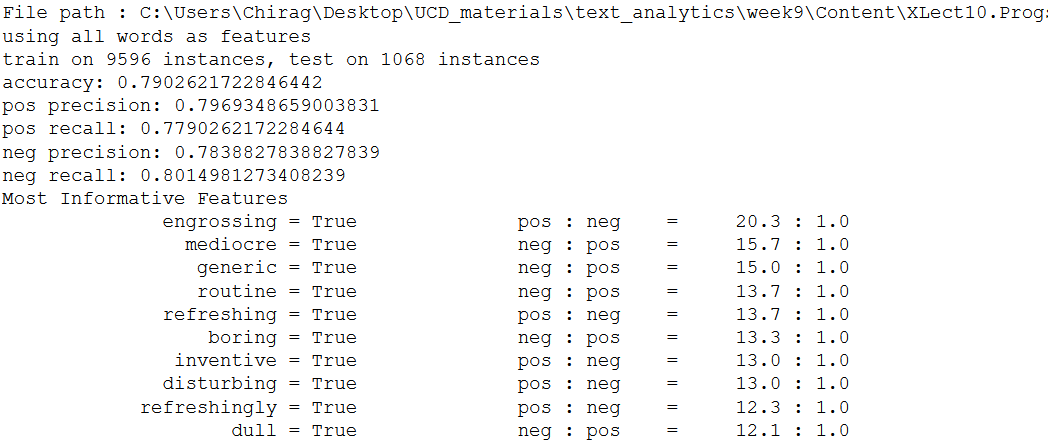

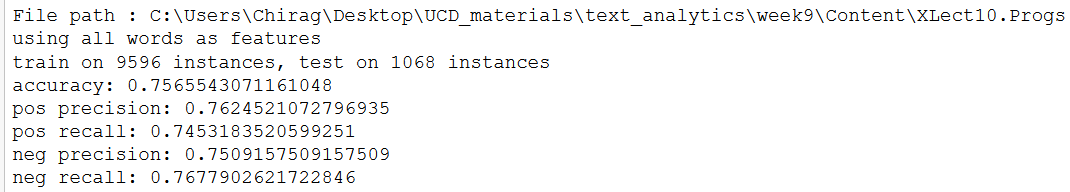 SVM -->

In [ ]:
#https://github.com/japerk/nltk3-cookbook/blob/master/chapter7.py